Dimensionality reduction on Boston housing dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Path = 'drive/My Drive/CMPE255/dataset/'

In [ ]:
from sklearn.datasets import load_boston

Boston dataset has 13 features which we can reduce by using PCA.



In [ ]:
# Load the data from sklearn module
import pandas as pd
boston_dataset = load_boston()
df = pd.DataFrame(load_boston().data,columns=boston_dataset.feature_names)
#df['MEDV'] = pd.DataFrame(load_boston().target)
print('Shape of Data is : {} rows and {} columns'.format(df.shape[0],df.shape[1]))

Shape of Data is : 506 rows and 13 columns


In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [ ]:
from sklearn.decomposition import PCA

Standardize data

In [ ]:
import pandas as pd  
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(df)
x = pd.DataFrame(x, columns=boston_dataset.feature_names)

Calculating PCA involves following steps:

1.Calculating the covariance matrix.  
2.Calculating the eigenvalues and eigenvector.  
3.Forming Principal Components.  
4.Projection into the new feature space

In [ ]:
from sklearn.decomposition import PCA
pcamodel = PCA(n_components=5)
pca = pcamodel.fit_transform(x)
pca.shape

(506, 5)

Explained variance ratio is the percentage of variance explained by each of the selected components. It’s attribute is explained_variance_ratio_

In [ ]:
import numpy as np
pcamodel.explained_variance_ 

array([6.1389812 , 1.43611329, 1.2450773 , 0.85927328, 0.83646904])

In [ ]:
pcamodel.explained_variance_ratio_

array([0.47129606, 0.11025193, 0.0955859 , 0.06596732, 0.06421661])

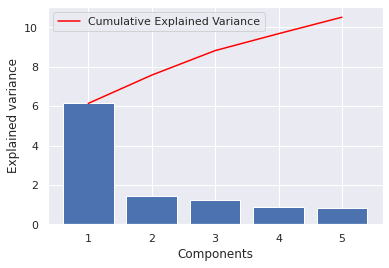

In [ ]:
import matplotlib.pyplot as plt 
plt.bar(range(1,len(pcamodel.explained_variance_ )+1),pcamodel.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pcamodel.explained_variance_ )+1),
         np.cumsum(pcamodel.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

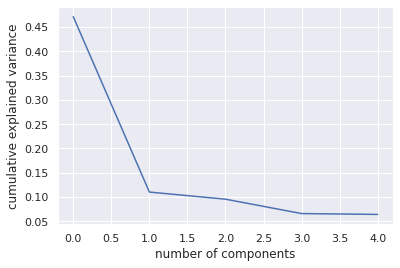

In [ ]:
plt.plot(pcamodel.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


#SVD implementation on Boston housing dataset

In [ ]:
from sklearn.decomposition import TruncatedSVD
# define transform
svd = TruncatedSVD()
# prepare transform on dataset
svd.fit(x)
# apply transform to dataset
transformed = svd.transform(x)

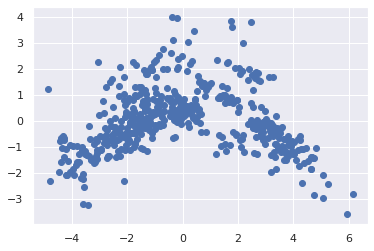

In [ ]:
plt.scatter(transformed[:, 0], transformed[:, 1],  cmap=plt.cm.hot)

#t-sne implementation on Boston housing dataset


In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
X_reduced = tsne.fit_transform(x)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 506 samples in 0.002s...
[t-SNE] Computed neighbors for 506 samples in 0.019s...
[t-SNE] Computed conditional probabilities for sample 506 / 506
[t-SNE] Mean sigma: 1.136771
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.194561
[t-SNE] KL divergence after 300 iterations: 0.427902


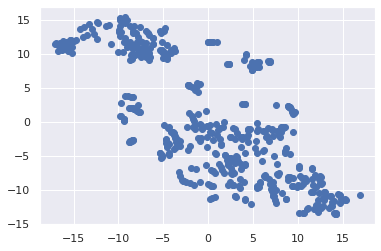

In [ ]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

#ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue = y)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1],  cmap=plt.cm.hot)

# LLE implementatio on Boston Housing dataset



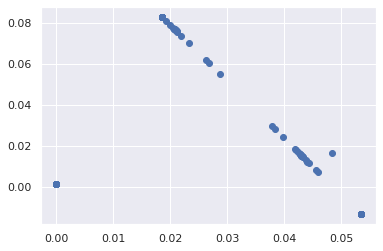

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(x)
X_reduced.shape

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

#ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue = y)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1],  cmap=plt.cm.hot)

# ISOMAP implementation on Boston Housing Dataset


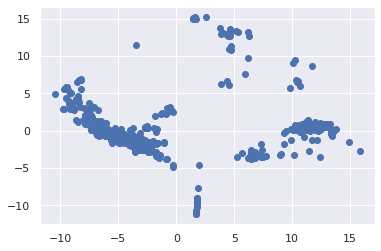

In [ ]:
from sklearn.manifold import Isomap
isomap = Isomap(n_components=2, n_neighbors=10)
X_reduced = isomap.fit_transform(x)
X_reduced.shape
target = boston_dataset.target[::30]

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

#ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue = y)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], cmap=plt.cm.get_cmap('jet', 10))

#UMAP implementation on Boston Housing Dataset

In [ ]:
pip install umap-learn

In [ ]:
import umap.umap_ as umap
embedding = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(x)

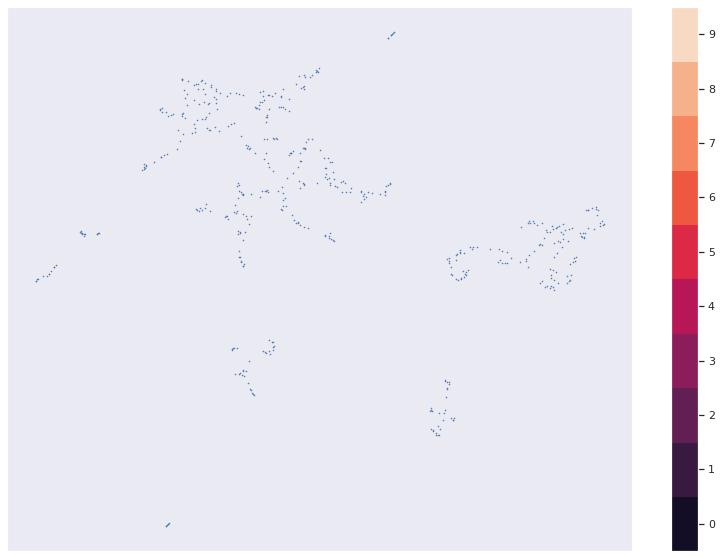

In [ ]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=0.3, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
#cbar.set_ticklabels(classes)
